In [44]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import models.clstm as clstm
import random
device = torch.device('cuda')
import pandas as pd

In [45]:
pd1_num = pd.read_csv('C:/Users/chanyoung/Desktop/Neural-GC-master/limited_num_block.csv')
pd2_num = pd.read_csv('C:/Users/chanyoung/Desktop/Neural-GC-master/limited_num_all.csv')
pd1_spd = pd.read_csv('C:/Users/chanyoung/Desktop/Neural-GC-master/limited_spd_block.csv')
pd2_spd = pd.read_csv('C:/Users/chanyoung/Desktop/Neural-GC-master/limited_spd_all.csv')

In [46]:
pd1_num = pd1_num[3600:].reset_index(drop = True)
pd2_num = pd2_num[3600:].reset_index(drop = True)
pd1_spd = pd1_spd[3600:].reset_index(drop = True)
pd2_spd = pd2_spd[3600:].reset_index(drop = True)

In [47]:
pd1_spd

,274886548#0_0,gneE0_0,274886548#1_0,274886545#0_0
0,7.22,37.42,40.48,47.53
1,6.58,26.21,42.40,51.10
2,6.17,21.05,42.28,51.87
3,4.90,27.53,35.56,45.20
4,5.20,24.42,35.82,41.66
...,...,...,...,...
3595,4.60,29.92,40.81,49.20
3596,4.53,21.72,37.35,50.15
3597,3.61,26.96,36.11,45.22
3598,4.87,32.16,38.44,44.26


In [48]:
list_one_min = []
for i in range(120):
    if i == 0:
        a = list(pd1_spd[i:i+29].mean(axis = 0).values)
    else:
        j = i * 29 + 1*i
        a = list(pd1_spd[j:j+29].mean(axis = 0).values)
    list_one_min.append(a)
df_flow1_min = pd.DataFrame(list_one_min,columns = pd1_spd.columns)  

In [49]:
df_flow1_min

,274886548#0_0,gneE0_0,274886548#1_0,274886545#0_0
0,6.450000,28.542414,38.713103,45.786897
1,5.706207,34.256552,39.115862,44.869655
2,7.893448,34.312414,37.939310,45.714828
3,6.239655,34.701034,39.647931,49.994828
4,8.654828,27.485862,38.733448,45.627241
...,...,...,...,...
115,9.229655,30.693793,39.907586,48.373103
116,7.267931,19.942759,36.635862,42.267241
117,6.075172,16.963448,37.734138,46.635862
118,5.922069,30.132414,38.497586,44.869655


In [51]:
pd2_spd

,276074127_0,274886548#0_0,gneE0_0,274886548#1_0,274886545#0_0
0,3.59,1.75,4.76,41.60,44.51
1,4.10,1.17,4.87,46.73,44.60
2,4.09,1.12,5.53,37.33,44.52
3,4.09,0.68,5.02,36.22,46.80
4,4.36,0.47,4.95,33.72,48.81
...,...,...,...,...,...
3595,3.15,2.35,3.31,33.62,44.47
3596,2.92,1.78,3.66,32.34,46.83
3597,3.14,0.84,3.66,36.97,48.40
3598,3.26,0.76,3.42,42.02,47.31


In [50]:
list_one_min = []
for i in range(120):
    if i == 0:
        a = list(pd2_spd[i:i+29].mean(axis = 0).values)
    else:
        j = i * 29 + 1*i
        a = list(pd2_spd[j:j+29].mean(axis = 0).values)
    list_one_min.append(a)
df_flow2_min = pd.DataFrame(list_one_min,columns = pd2_spd.columns)  

In [52]:
df_flow2_min

,276074127_0,274886548#0_0,gneE0_0,274886548#1_0,274886545#0_0
0,5.162414,1.610690,4.521724,38.457931,46.432069
1,3.215517,3.887241,4.144828,38.630345,45.624828
2,3.507586,4.759310,3.240690,38.616552,44.600345
3,3.588966,4.024483,3.255172,38.906552,45.982414
4,5.200690,3.027586,3.233103,37.769310,44.979310
...,...,...,...,...,...
115,4.576207,3.206897,3.562069,39.234138,45.730690
116,4.138621,3.485862,2.852759,39.113448,46.115172
117,4.491034,2.702414,4.331379,38.984828,46.953103
118,3.027931,5.494483,3.175517,39.892759,47.064828


In [54]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
df_true_ = df_flow2_min.values
X_all =torch.tensor(df_true_[np.newaxis], dtype = torch.float32, device = device)

In [55]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
df_true_ = df_flow1_min.values
X_block =torch.tensor(df_true_[np.newaxis], dtype = torch.float32, device = device)

In [56]:
np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
clstm_all = clstm.cLSTM(X_all.shape[-1], hidden=100).cuda(device=device)

np.random.seed(42)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
clstm_block = clstm.cLSTM(X_block.shape[-1], hidden=100).cuda(device=device)

In [57]:
train_loss_ista_all = clstm.train_model_ista(
    clstm_all, X_all, context=10,lam = 10, lam_ridge = 1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 44.071255
Variable usage = 100.00%
----------Iter = 100----------
Loss = 20.563967
Variable usage = 100.00%
----------Iter = 150----------
Loss = 11.690487
Variable usage = 40.00%
----------Iter = 200----------
Loss = 10.017612
Variable usage = 36.00%
----------Iter = 250----------
Loss = 9.060942
Variable usage = 28.00%
----------Iter = 300----------
Loss = 8.527313
Variable usage = 28.00%
----------Iter = 350----------
Loss = 8.301185
Variable usage = 28.00%
----------Iter = 400----------
Loss = 8.121574
Variable usage = 28.00%
----------Iter = 450----------
Loss = 7.974285
Variable usage = 28.00%
----------Iter = 500----------
Loss = 7.894508
Variable usage = 28.00%
----------Iter = 550----------
Loss = 7.830080
Variable usage = 28.00%
----------Iter = 600----------
Loss = 7.773137
Variable usage = 28.00%
----------Iter = 650----------
Loss = 7.731155
Variable usage = 28.00%
----------Iter = 700----------
Loss = 7.695930
Variable usage = 28.00%
-

In [58]:
train_loss_ista_all = clstm.train_model_ista(
    clstm_block, X_block, context=10,lam = 10, lam_ridge = 1e-2, lr=1e-3, max_iter=20000,
    check_every=50)

----------Iter = 50----------
Loss = 53.693596
Variable usage = 100.00%
----------Iter = 100----------
Loss = 37.132736
Variable usage = 100.00%
----------Iter = 150----------
Loss = 29.500334
Variable usage = 68.75%
----------Iter = 200----------
Loss = 27.465332
Variable usage = 62.50%
----------Iter = 250----------
Loss = 26.562355
Variable usage = 62.50%
----------Iter = 300----------
Loss = 25.915255
Variable usage = 43.75%
----------Iter = 350----------
Loss = 25.640753
Variable usage = 56.25%
----------Iter = 400----------
Loss = 25.251060
Variable usage = 43.75%
----------Iter = 450----------
Loss = 25.425850
Variable usage = 62.50%
----------Iter = 500----------
Loss = 29.856602
Variable usage = 68.75%
----------Iter = 550----------
Loss = 27.261276
Variable usage = 68.75%
----------Iter = 600----------
Loss = 29.076443
Variable usage = 68.75%
----------Iter = 650----------
Loss = 34.868534
Variable usage = 68.75%
Stopping early


one block 0 road
274886548#0_0


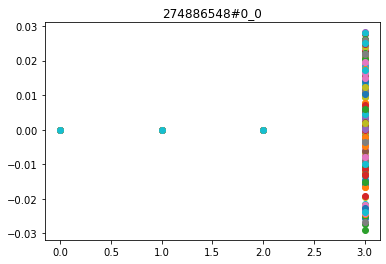

------------------------------------
one block 1 road
gneE0_0


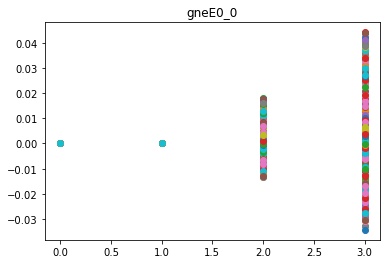

------------------------------------
one block 2 road
274886548#1_0


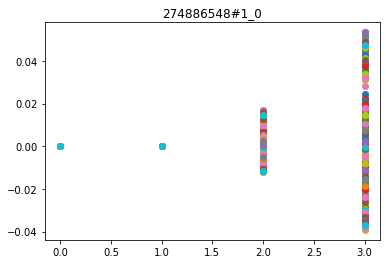

------------------------------------
one block 3 road
274886545#0_0


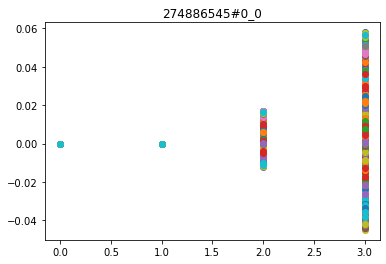

------------------------------------


In [67]:
for i in range(df_flow1_min.shape[-1]):
    print("one block",i,"road")
    print(df_flow1_min.columns[i])
    clstm_block.weight_causality(i ,df_flow1_min.columns)
    print('------------------------------------')

In [65]:
df_flow1_min

,274886548#0_0,gneE0_0,274886548#1_0,274886545#0_0
0,6.450000,28.542414,38.713103,45.786897
1,5.706207,34.256552,39.115862,44.869655
2,7.893448,34.312414,37.939310,45.714828
3,6.239655,34.701034,39.647931,49.994828
4,8.654828,27.485862,38.733448,45.627241
...,...,...,...,...
115,9.229655,30.693793,39.907586,48.373103
116,7.267931,19.942759,36.635862,42.267241
117,6.075172,16.963448,37.734138,46.635862
118,5.922069,30.132414,38.497586,44.869655


no block 0 road
276074127_0


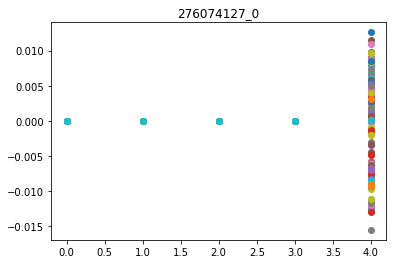

------------------------------------
no block 1 road
274886548#0_0


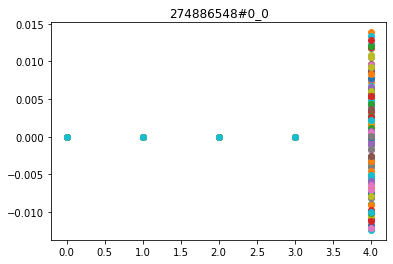

------------------------------------
no block 2 road
gneE0_0


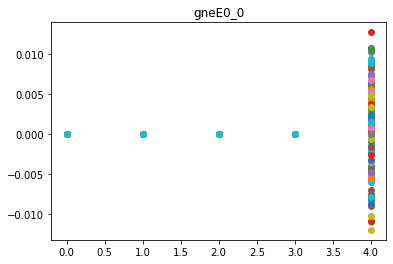

------------------------------------
no block 3 road
274886548#1_0


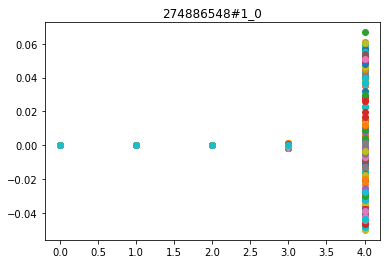

------------------------------------
no block 4 road
274886545#0_0


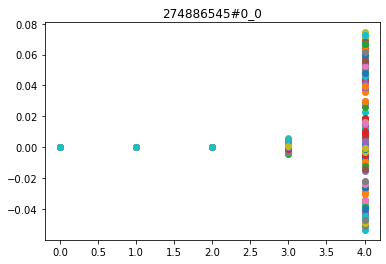

------------------------------------


In [66]:
for i in range(df_flow2_min.shape[-1]):
    print("no block",i,"road")
    print(df_flow2_min.columns[i])
    clstm_all.weight_causality(i ,df_flow2_min.columns)
    print('------------------------------------')

In [61]:
GC_all = clstm_all.GC(threshold = False).cpu().data.numpy()

In [62]:
GC_block = clstm_block.GC(threshold = False).cpu().data.numpy()

In [63]:
GC_all

array([[0.        , 0.        , 0.        , 0.        , 0.07357248],
       [0.        , 0.        , 0.        , 0.        , 0.07973887],
       [0.        , 0.        , 0.        , 0.        , 0.06478246],
       [0.        , 0.        , 0.        , 0.01367525, 0.70959723],
       [0.        , 0.        , 0.        , 0.04575678, 0.7826791 ]],
      dtype=float32)

In [64]:
GC_block

array([[0.        , 0.        , 0.        , 0.24028693],
       [0.        , 0.        , 0.20001975, 0.5029676 ],
       [0.        , 0.        , 0.1907918 , 0.6143097 ],
       [0.        , 0.        , 0.20235966, 0.7098146 ]], dtype=float32)